In [3]:
from train import train_prog_cycle_gan

START_TRAIN_IMG_SIZE: 4
TARGET_IMG_SIZE: 16
Z_DIM: 100
IN_CHANNELS: 256
IMG_CHANNELS: 3
BATCH_SIZE: 1
LEARNING_RATE: 0.0001
EPOCHS: 30
DEVICE: mps
NUM_STEPS: 3
SOURCE_DATASET: CELEBA
STYLE_DATASET: Monet
OUTPUT_DIR: outputs


In [ ]:
working_dir, gen_A2B, gen_B2A = train_prog_cycle_gan()

Training at image size 4x4
Epoch [0/100] Batch 0 Loss D: 1256.9135, loss G: 3119.6936, alpha: 0.0010
Epoch [0/100] Batch 200 Loss D: 2.3403, loss G: 290.4902, alpha: 0.2010
Epoch [0/100] Batch 400 Loss D: 8.6105, loss G: 269.6315, alpha: 0.4010
Epoch [0/100] Batch 600 Loss D: 5.9179, loss G: 193.4974, alpha: 0.6010
Epoch [0/100] Batch 800 Loss D: 10.3647, loss G: 204.6948, alpha: 0.8010
Epoch [0/100] Batch 1000 Loss D: 6.3457, loss G: 208.7629, alpha: 1.0000
Checkpoint saved at step 0, epoch 0.
Epoch [1/100] Batch 0 Loss D: 2.2646, loss G: 224.5692, alpha: 1.0000
Epoch [1/100] Batch 200 Loss D: 13.8276, loss G: 189.3015, alpha: 1.0000
Epoch [1/100] Batch 400 Loss D: 5.3152, loss G: 111.7640, alpha: 1.0000
Epoch [1/100] Batch 600 Loss D: 1.3688, loss G: 136.2754, alpha: 1.0000
Epoch [1/100] Batch 800 Loss D: 2.7044, loss G: 133.3129, alpha: 1.0000
Epoch [1/100] Batch 1000 Loss D: 2.7471, loss G: 117.0956, alpha: 1.0000
Checkpoint saved at step 0, epoch 1.
Epoch [2/100] Batch 0 Loss D: 7

In [1]:
from generator import GeneratorCycleGAN
from utils import load_genA2B

gen_A2B_loaded = GeneratorCycleGAN(in_channels=256, img_channels=3).to("mps")
generator = load_genA2B(
    "outputs/CELEBA to Vangogh 2024-12-07 03-11-50/checkpoint_step_2_epoch_29.pth",
    gen_A2B_loaded,
)

Checkpoint loaded from step 2, epoch 29.


/Users/dhavalpotdar/Workarea/COMPSCI675D/Project/ProgCycleGAN/utils.py:47: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(filepath)


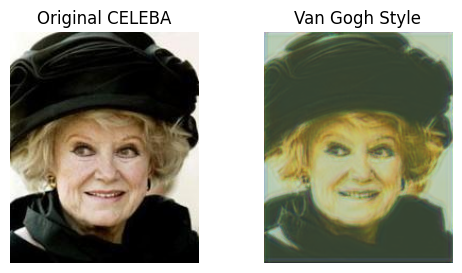

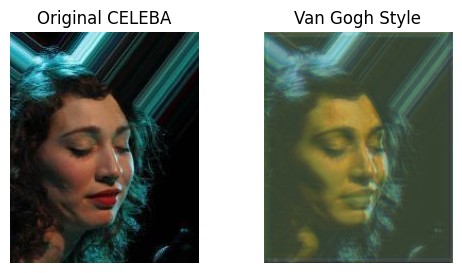

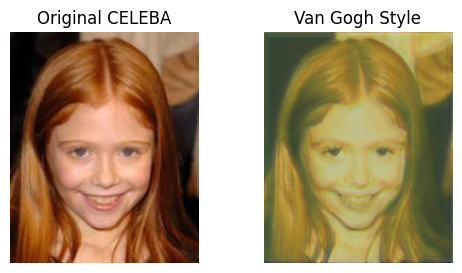

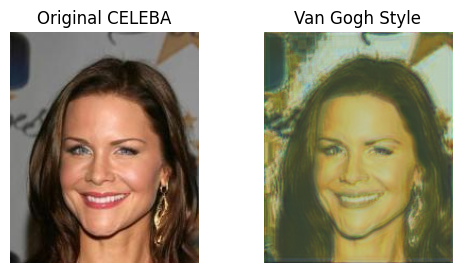

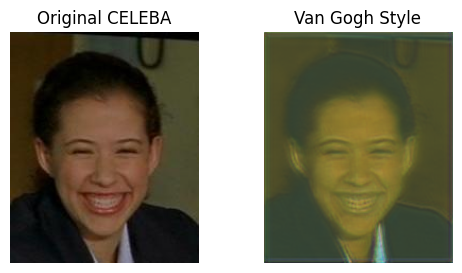

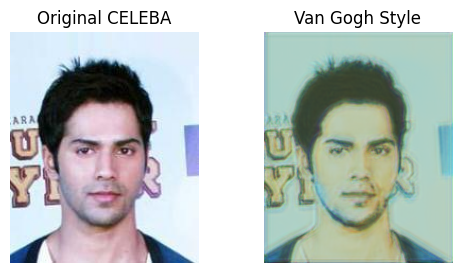

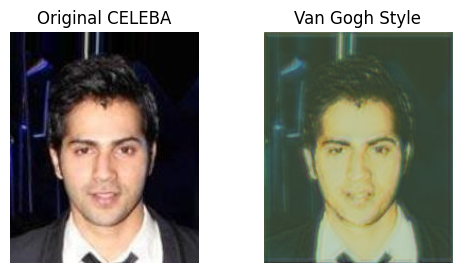

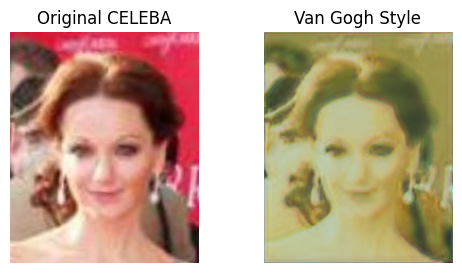

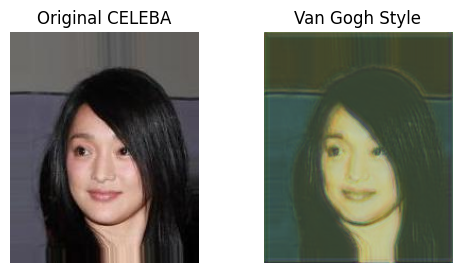

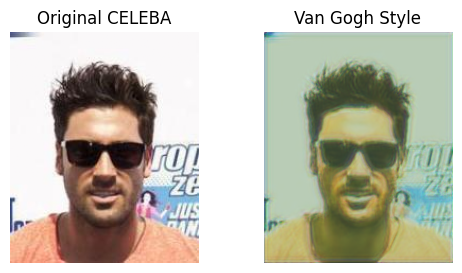

In [2]:
from testloaders import test_on_celeba, test_on_cifar10

test_on_celeba(generator, 3)

In [ ]:
# This script evaluates the performance of a trained Progressive CycleGAN model using two metrics:
# Fréchet Inception Distance (FID) and Inception Score (IS). 
# FID measures the similarity between the generated images (fake_dir) and the target domain images (real_dir),
# indicating how closely the generated images resemble real samples in the target domain.
# IS evaluates the quality and diversity of the generated images, with higher scores indicating 
# realistic and varied outputs.
# 
# Steps:
# 1. Load a pre-trained generator model (e.g., for CelebA to Van Gogh style transfer).
# 2. Use the generator to create stylized images and save them to a specified directory (fake_dir).
# 3. Compare these generated images with the real target domain images (real_dir) to compute FID and IS.
# 4. Print the calculated FID and IS scores to assess the quality and diversity of the generated images.

from utils import compute_fid, compute_inception_score, load_genA2B
from testloaders import test_on_celeba
from generator import GeneratorCycleGAN

# Load the generator and generate fake images
gen_A2B_loaded = GeneratorCycleGAN(in_channels=256, img_channels=3).to("cuda")
generator = load_genA2B(
    "./checkpoints/celeba2vangogh/checkpoint_step_2_epoch_29.pth",
    gen_A2B_loaded,
    device="cuda", 
)

# Generate fake images and save them to a directory
test_on_celeba(generator, num_steps=3, fake_dir="eval_images/fake")

# Evaluate the performance
real_dir = "data/vangogh/train"
fake_dir = "./eval_images/fake"
fid_score = compute_fid(real_dir, fake_dir)
print(f"FID Score: {fid_score}")

inception_score = compute_inception_score(fake_dir)
print(f"Inception Score: {inception_score}")

